In [ ]:
pip install torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install transformers

In [ ]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.0 MB/s eta 0:00:00


In [ ]:
!pip install torchvision

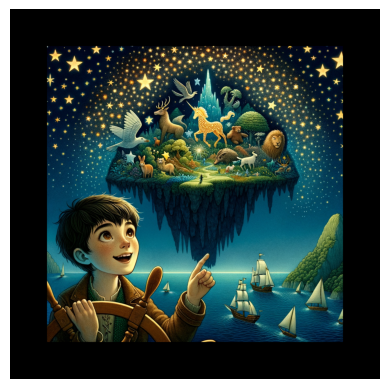

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:783: FutureWarning: You are using a legacy checkpoint for inpainting with Stable Diffusion, therefore we are loading the <class 'diffusers.pipelines.deprecated.stable_diffusion_variants.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> class instead of <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'>. For better inpainting results, we strongly suggest using Stable Diffusion's official inpainting checkpoint: https://huggingface.co/runwayml/stable-diffusion-inpainting instead or adapting your checkpoint CompVis/stable-diffusion-v1-4 to the format of https://huggingface.co/runwayml/stable-diffusion-inpainting. Note that we do not actively maintain the {StableDiffusionInpaintPipelineLegacy} class and will likely remove it in version 1.0.0.
  deprecate("StableDiffusionInpaintPipelineLegacy", "1.0.0", deprecation_message, s

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/deprecated/stable_diffusion_variants/pipeline_stable_diffusion_inpaint_legacy.py:141: FutureWarning: The class <class 'diffusers.pipelines.deprecated.stable_diffusion_variants.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> is deprecated and will be removed in v1.0.0. You can achieve exactly the same functionalityby loading your model into `StableDiffusionInpaintPipeline` instead. See https://github.com/huggingface/diffusers/pull/3533for more information.
  deprecate("legacy is outdated", "1.0.0", deprecation_message, standard_warn=False)


CUDA is not available. Running on CPU.


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from diffusers import StableDiffusionInpaintPipeline

# Download the image
url = "https://drive.google.com/uc?export=download&id=17FCAXI5mS2Iof9NWQAmg68H2rGK0xTIc"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Add padding to the image
padding = 128
new_size = (img.width + 2 * padding, img.height + 2 * padding)
padded_img = Image.new("RGB", new_size)
padded_img.paste(img, (padding, padding))

# Display the padded image
plt.imshow(padded_img)
plt.axis("off")
plt.show()

# Load the pre-trained model
pipe = StableDiffusionInpaintPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

# Check if CUDA is available and move the model accordingly
if torch.cuda.is_available():
    pipe = pipe.to("cuda")
else:
    print("CUDA is not available. Running on CPU.")

# Prepare the inputs for the model
init_image = padded_img.resize((512, 512))
init_image = transforms.ToTensor()(init_image).unsqueeze(0)

# Move init_image to the correct device
if torch.cuda.is_available():
    init_image = init_image.to("cuda")

# Create a black mask image
# The mask should have the same size as the input image
mask_image = Image.new('RGB', (512, 512), (0, 0, 0))

# Generate the outpainted image
with torch.no_grad():
    generated_image = pipe(
        prompt="Extend the landscape seamlessly",
        image=init_image, # Use 'image' instead of 'init_image'
        mask_image=mask_image, # Pass the mask image to the pipeline
        strength=0.75
    )["sample"][0]

# Convert the generated image back to PIL format and display it
generated_image = transforms.ToPILImage()(generated_image.cpu().squeeze(0))
plt.imshow(generated_image)
plt.axis("off")
plt.show()

# Save the outpainted image
generated_image.save("/content/outpainted_image.png")